## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Download the webpage at the url


In [120]:
#your code goes here
data = requests.get(url).content

Create a soup object


In [122]:
#your code goes here
soup = BeautifulSoup(data, "html.parser")


Scrape the `Language name` and `annual average salary`.


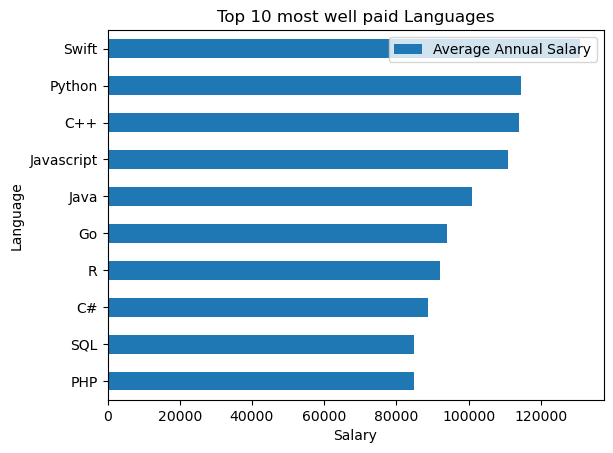

In [4]:
data = pd.read_html(url)
df = data[0]
df.columns = df.iloc[0]
df = df.drop(df[df['Language']=='Language'].index)
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace(r'[,/$.]','', regex=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype('int')
df_sorted = df.sort_values(by='Average Annual Salary', ascending=True)
df_sorted.plot(kind='barh', y= 'Average Annual Salary', x='Language')
plt.title('Top 10 most well paid Languages')
plt.xlabel('Salary')
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


In [148]:
#your code goes here
import matplotlib.pyplot as plt
table = soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    lang_name = cols[1].getText()
    avg_sal = cols[3].getText()
    with open('popular-languages.csv', 'w') as f:
        for i in lang_name:
            f.writelines(i)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
